In [ ]:
#Performance Measures

In [31]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # For enhanced visualizations

DataFrame with Total Ridership and Date (first 5 rows):
   MONTH  YEAR  FULL_FARE  STUDENT  ELDERLY  VETS    DSS  UNIQUE_ID  FID  \
0      1  2013     234631    35971    73949  1338  33124          1    1   
1      2  2013     198464    40659    62444  1514  29868          2    2   
2      3  2013     243550    43526    78885  1702  34782          3    3   
3      4  2013     269228    49518    86242  1454  35415          4    4   
4      5  2013     268779    41819    86801  1539  33794          5    5   

        Date  Total_Ridership  
0 2013-01-01           379013  
1 2013-02-01           332949  
2 2013-03-01           402445  
3 2013-04-01           441857  
4 2013-05-01           432732  


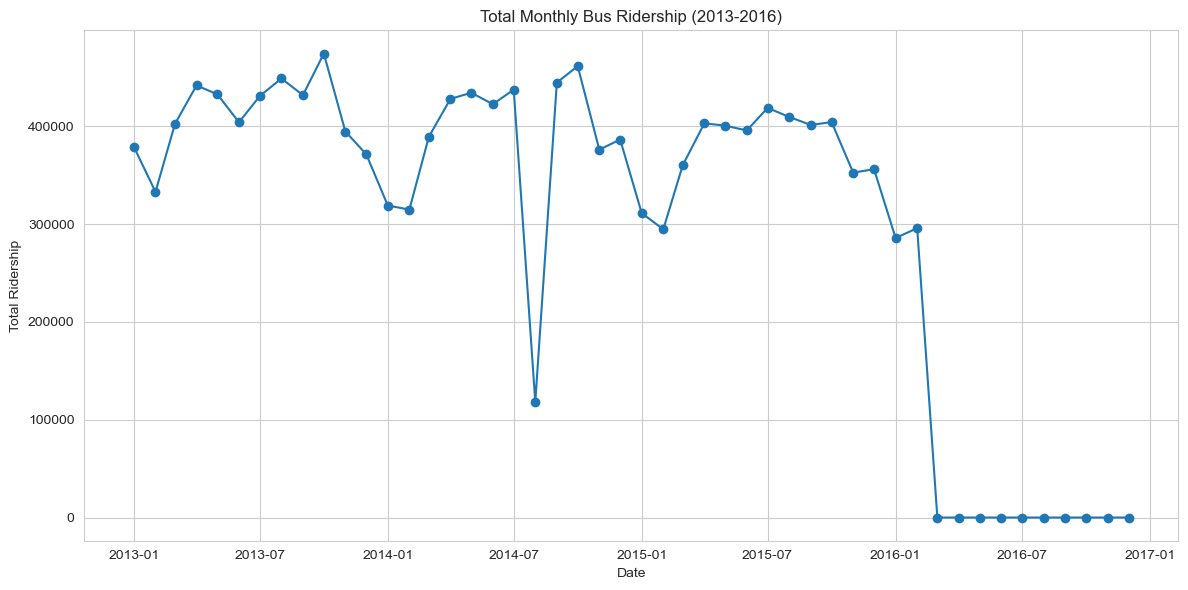


Annual Total Ridership (2013-2015):
   YEAR  Total_Ridership
0  2013          4945596
1  2014          4532932
2  2015          4508790

Average Monthly Ridership by Year:
   YEAR  Total_Ridership
0  2013    412133.000000
1  2014    377744.333333
2  2015    375732.500000
3  2016     48475.083333

Overall Ridership Distribution by Fare Type (%):
FULL_FARE    60.208934
ELDERLY      20.489259
STUDENT      10.991159
DSS           8.013251
VETS          0.297398
dtype: float64


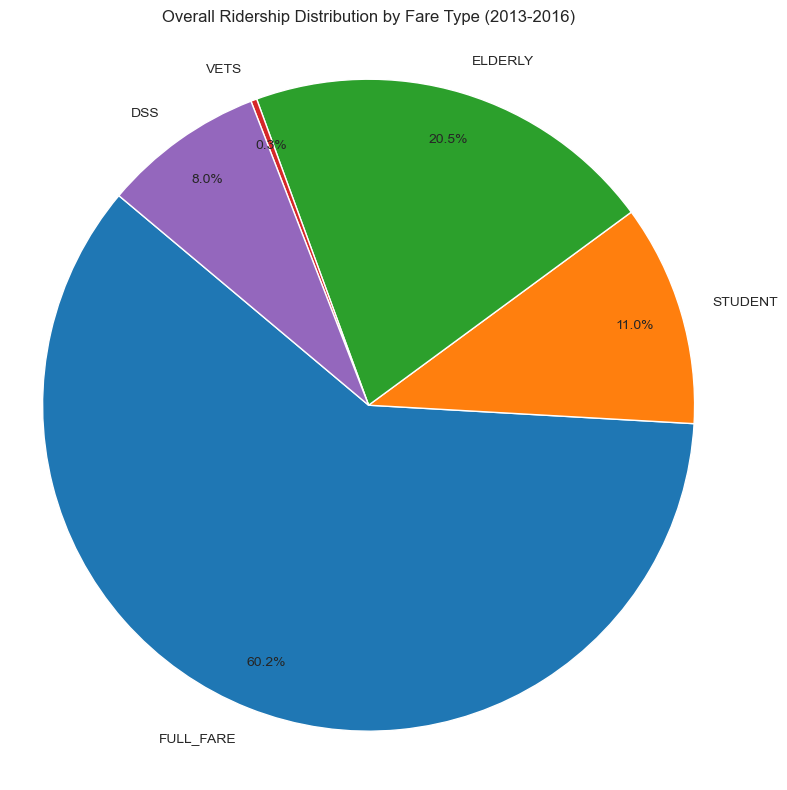

In [33]:
# Load the Bus Ridership Demographics data
bus_ridership_df = pd.read_csv("C:\\Users\\vumma\\OneDrive\\Desktop\\imp\\Data Analysis Capstone Project\\Bus_Ridership_Demographics_2013_-_2016.csv")

# Combine MONTH and YEAR into a datetime object for time-series analysis
bus_ridership_df['Date'] = pd.to_datetime(bus_ridership_df['YEAR'].astype(str) + '-' + bus_ridership_df['MONTH'].astype(str) + '-01')

# Calculate total monthly ridership by summing all fare type columns
fare_columns = ['FULL_FARE', 'STUDENT', 'ELDERLY', 'VETS', 'DSS']
bus_ridership_df['Total_Ridership'] = bus_ridership_df[fare_columns].sum(axis=1)

print("DataFrame with Total Ridership and Date (first 5 rows):")
print(bus_ridership_df.head())

# --- Plot Total Monthly Ridership Trend ---
plt.figure(figsize=(12, 6))
plt.plot(bus_ridership_df['Date'], bus_ridership_df['Total_Ridership'], marker='o', linestyle='-')
plt.title('Total Monthly Bus Ridership (2013-2016)')
plt.xlabel('Date')
plt.ylabel('Total Ridership')
plt.grid(True)
plt.tight_layout()
plt.show() # Display the plot in Jupyter
# plt.savefig('total_monthly_ridership_trend.png') # You can uncomment this to save it locally

# --- Annual Ridership Summary (excluding incomplete 2016) ---
# Filter out 2016 data for accurate annual sum
annual_ridership_summary = bus_ridership_df[bus_ridership_df['YEAR'] != 2016].groupby('YEAR')['Total_Ridership'].sum().reset_index()
print("\nAnnual Total Ridership (2013-2015):")
print(annual_ridership_summary)

# --- Average Monthly Ridership by Year ---
average_monthly_ridership_by_year = bus_ridership_df.groupby('YEAR')['Total_Ridership'].mean().reset_index()
print("\nAverage Monthly Ridership by Year:")
print(average_monthly_ridership_by_year)


# --- Ridership Distribution by Fare Type (Overall) ---
overall_fare_distribution = bus_ridership_df[fare_columns].sum()
overall_fare_distribution_percent = (overall_fare_distribution / overall_fare_distribution.sum()) * 100

print("\nOverall Ridership Distribution by Fare Type (%):")
print(overall_fare_distribution_percent.sort_values(ascending=False))

# Create a pie chart for fare type distribution
plt.figure(figsize=(8, 8))
plt.pie(overall_fare_distribution, labels=overall_fare_distribution.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Overall Ridership Distribution by Fare Type (2013-2016)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show() # Display the plot in Jupyter
# plt.savefig('ridership_fare_type_distribution.png') # You can uncomment this to save it locally



Original Book1.xlsx - Sheet1.csv Head:
   Year  UPT-FH    VRM      VRH          TOE  UPT-FM
0  2023     4.0  $6.21  $118.60  $94,515,785     0.2
1  2022     6.1  $7.07  $129.83  $86,180,665     0.3
2  2021     5.6  $6.66  $122.18  $83,072,904     0.3
3  2020     5.7  $6.30  $116.13  $80,909,040     0.3
4  2019     9.2  $6.17   $109.6  $81,176,841     0.5
Original Book1.xlsx - Sheet1.csv Head:
   Year  UPT-FH    VRM      VRH          TOE  UPT-FM
0  2023     4.0  $6.21  $118.60  $94,515,785     0.2
1  2022     6.1  $7.07  $129.83  $86,180,665     0.3
2  2021     5.6  $6.66  $122.18  $83,072,904     0.3
3  2020     5.7  $6.30  $116.13  $80,909,040     0.3
4  2019     9.2  $6.17   $109.6  $81,176,841     0.5

Cleaned Book1.xlsx - Sheet1.csv Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    11 non-null     int64  
 1   UPT-FH  11 non-null     float

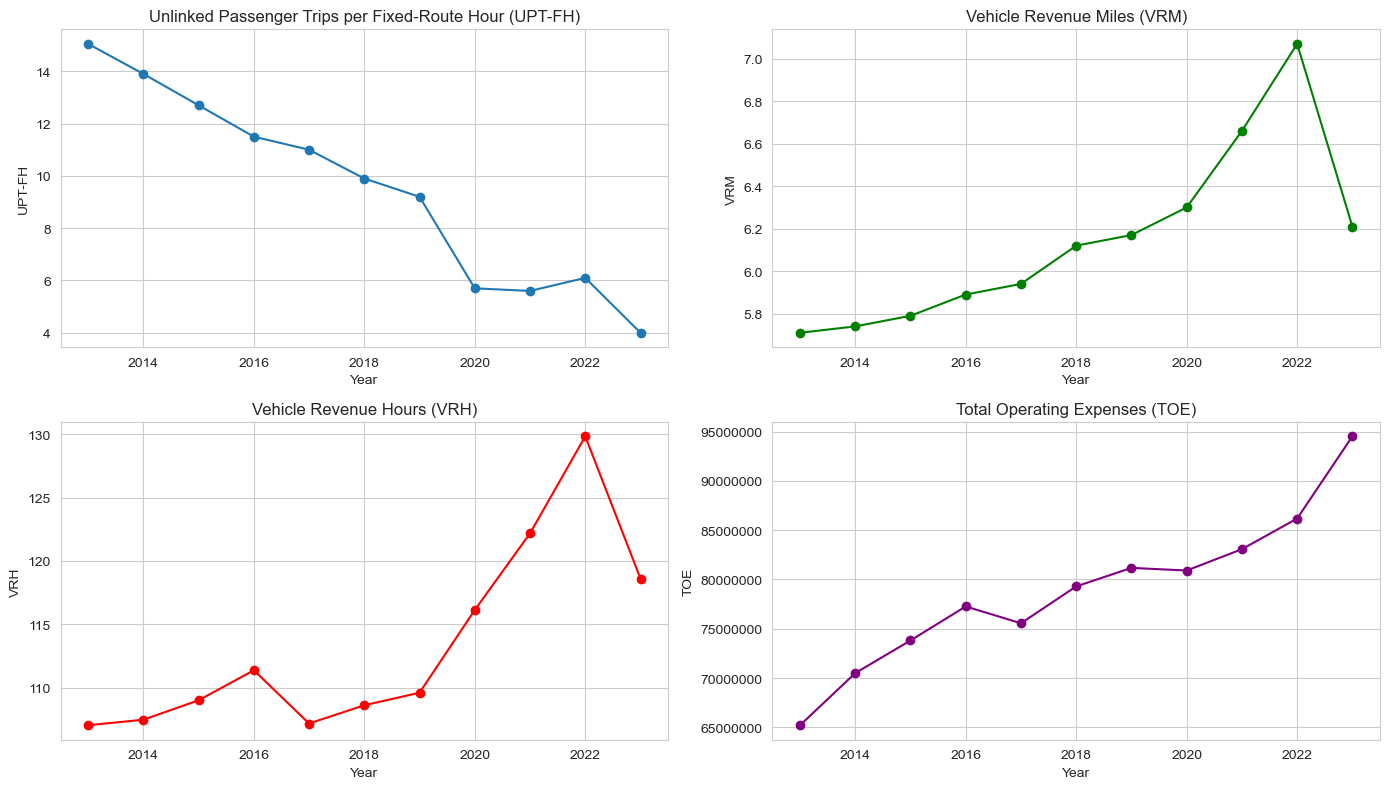

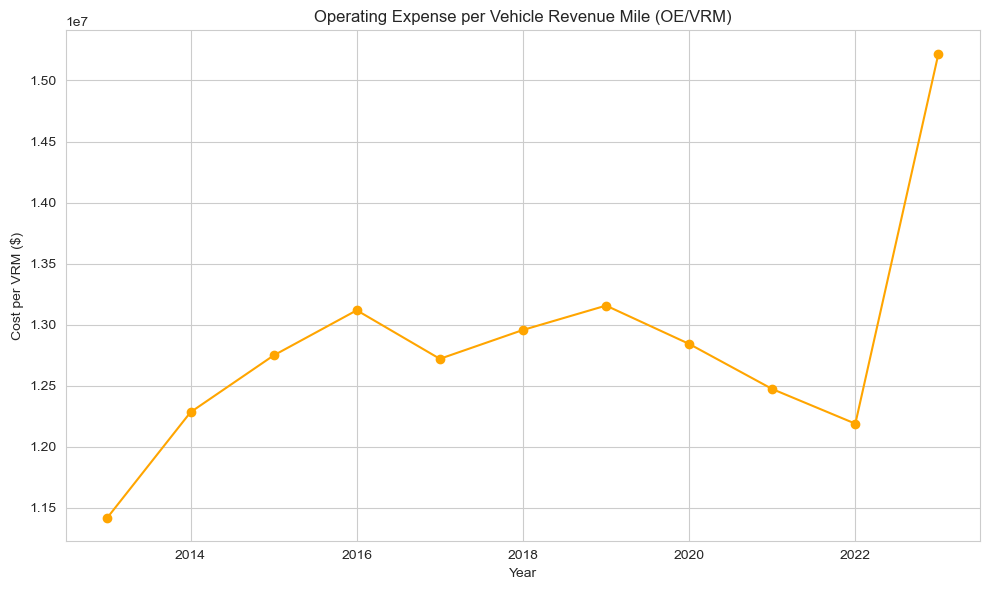

In [39]:
# Load the Transit Performance Metrics data
import pandas as pd

# Load the Transit Performance Metrics data using pd.read_excel
book1_sheet1_df = pd.read_excel("C:\\Users\\vumma\\OneDrive\\Desktop\\imp\\Data Analysis Capstone Project\\National Level Performance metrics\\Book1.xlsx")

print("Original Book1.xlsx - Sheet1.csv Head:")
print(book1_sheet1_df.head())

print("Original Book1.xlsx - Sheet1.csv Head:")
print(book1_sheet1_df.head())

# --- Data Cleaning ---
# Clean and convert columns to numeric
# Remove '$' and ',' from ' VRM', 'VRH', 'TOE' and convert to float
for col in [' VRM', 'VRH', 'TOE']:
    # Check if the column exists before processing
    if col in book1_sheet1_df.columns:
        book1_sheet1_df[col] = book1_sheet1_df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
        # Handle potential empty strings or non-numeric after cleaning by coercing to numeric
        book1_sheet1_df[col] = pd.to_numeric(book1_sheet1_df[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in Book1.xlsx - Sheet1.csv")


# Rename columns to remove leading/trailing spaces for easier access
book1_sheet1_df.columns = book1_sheet1_df.columns.str.strip()

print("\nCleaned Book1.xlsx - Sheet1.csv Info:")
print(book1_sheet1_df.info())
print("\nCleaned Book1.xlsx - Sheet1.csv Head (numeric values):")
print(book1_sheet1_df.head())

# --- Calculate Key Performance Indicators (KPIs) ---
# Check if VRM and TOE columns exist and are numeric before calculation
if 'VRM' in book1_sheet1_df.columns and 'TOE' in book1_sheet1_df.columns and \
   pd.api.types.is_numeric_dtype(book1_sheet1_df['VRM']) and pd.api.types.is_numeric_dtype(book1_sheet1_df['TOE']):

    # Operating Expense per Vehicle Revenue Mile (Cost Efficiency)
    # Handle division by zero or NaN values in VRM
    book1_sheet1_df['OE_per_VRM'] = book1_sheet1_df['TOE'] / book1_sheet1_df['VRM']
    book1_sheet1_df['OE_per_VRM'] = book1_sheet1_df['OE_per_VRM'].replace([float('inf'), -float('inf')], pd.NA) # Replace inf with NA

    print("\nDataFrame with Calculated KPI (OE_per_VRM):")
    print(book1_sheet1_df[['Year', 'TOE', 'VRM', 'OE_per_VRM']].head())
else:
    print("\nSkipping OE_per_VRM calculation: 'VRM' or 'TOE' columns are missing or not numeric.")


# --- Time-series Analysis of Key Metrics ---
# Plotting trends of UPT-FH, VRM, VRH, TOE
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st plot
plt.plot(book1_sheet1_df['Year'], book1_sheet1_df['UPT-FH'], marker='o')
plt.title('Unlinked Passenger Trips per Fixed-Route Hour (UPT-FH)')
plt.xlabel('Year')
plt.ylabel('UPT-FH')
plt.grid(True)

plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd plot
plt.plot(book1_sheet1_df['Year'], book1_sheet1_df['VRM'], marker='o', color='green')
plt.title('Vehicle Revenue Miles (VRM)')
plt.xlabel('Year')
plt.ylabel('VRM')
plt.grid(True)

plt.subplot(2, 2, 3) # 2 rows, 2 columns, 3rd plot
plt.plot(book1_sheet1_df['Year'], book1_sheet1_df['VRH'], marker='o', color='red')
plt.title('Vehicle Revenue Hours (VRH)')
plt.xlabel('Year')
plt.ylabel('VRH')
plt.grid(True)

plt.subplot(2, 2, 4) # 2 rows, 2 columns, 4th plot
plt.plot(book1_sheet1_df['Year'], book1_sheet1_df['TOE'], marker='o', color='purple')
plt.title('Total Operating Expenses (TOE)')
plt.xlabel('Year')
plt.ylabel('TOE')
plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation on Y-axis
plt.grid(True)

plt.tight_layout()
plt.show()
# plt.savefig('transit_performance_trends.png')

# Plotting the derived KPI (if calculated)
if 'OE_per_VRM' in book1_sheet1_df.columns and not book1_sheet1_df['OE_per_VRM'].isnull().all():
    plt.figure(figsize=(10, 6))
    plt.plot(book1_sheet1_df['Year'], book1_sheet1_df['OE_per_VRM'], marker='o', color='orange')
    plt.title('Operating Expense per Vehicle Revenue Mile (OE/VRM)')
    plt.xlabel('Year')
    plt.ylabel('Cost per VRM ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    # plt.savefig('oe_per_vrm_trend.png')
else:
    print("\nCannot plot OE_per_VRM trend due to missing or non-numeric data.")

In [ ]:
#Operation Characteristics

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Default figure size
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['lines.linewidth'] = 2

# Load the data
# Make sure 'Operation Characteristics.xlsx - give me a raw spreadsheet struc.csv' is in the same directory as your notebook
df = pd.read_excel("C:\\Users\\vumma\\OneDrive\\Desktop\\imp\\Data Analysis Capstone Project\\Operation Characteristics.xlsx")

# Display initial information
print("### Data Overview ###")
print(df.head())
print("\n")
print(df.info())
print("\n")
print("### Descriptive Statistics ###")
print(df.describe())
print("\n")

### Data Overview ###
   Year  Operating Expenses (Bus)  Annual Passenger Miles (Bus)  \
0  2013                  41290205                      44701680   
1  2014                  43667980                      40220229   
2  2015                  46045755                      36930522   
3  2016                  48423530                      32954728   
4  2017                  50801305                      30606878   

   Annual Unlinked Trips (Bus)  Annual Vehicle Revenue Miles (Bus)  \
0                      5805413                             7232629   
1                      5652265                             7613268   
2                      5186871                             7682537   
3                      4628474                             7610499   
4                      4296218                             7036920   

   Annual Vehicle Revenue Hours (Bus)  \
0                              385769   
1                              406327   
2                              

### Year-over-Year Percentage Changes ###
    Year  YoY_Operating_Expenses_Change  YoY_Passenger_Miles_Change  \
0   2013                            NaN                         NaN   
1   2014                           5.76                      -10.03   
2   2015                           5.45                       -8.18   
3   2016                           5.16                      -10.77   
4   2017                           4.91                       -7.12   
5   2018                           4.68                       -8.90   
6   2019                           4.47                       -6.10   
7   2020                           4.28                      -39.18   
8   2021                           4.10                       -1.62   
9   2022                           3.94                        9.41   
10  2023                           3.79                        7.18   

    YoY_Unlinked_Trips_Change  
0                         NaN  
1                       -2.64  
2        

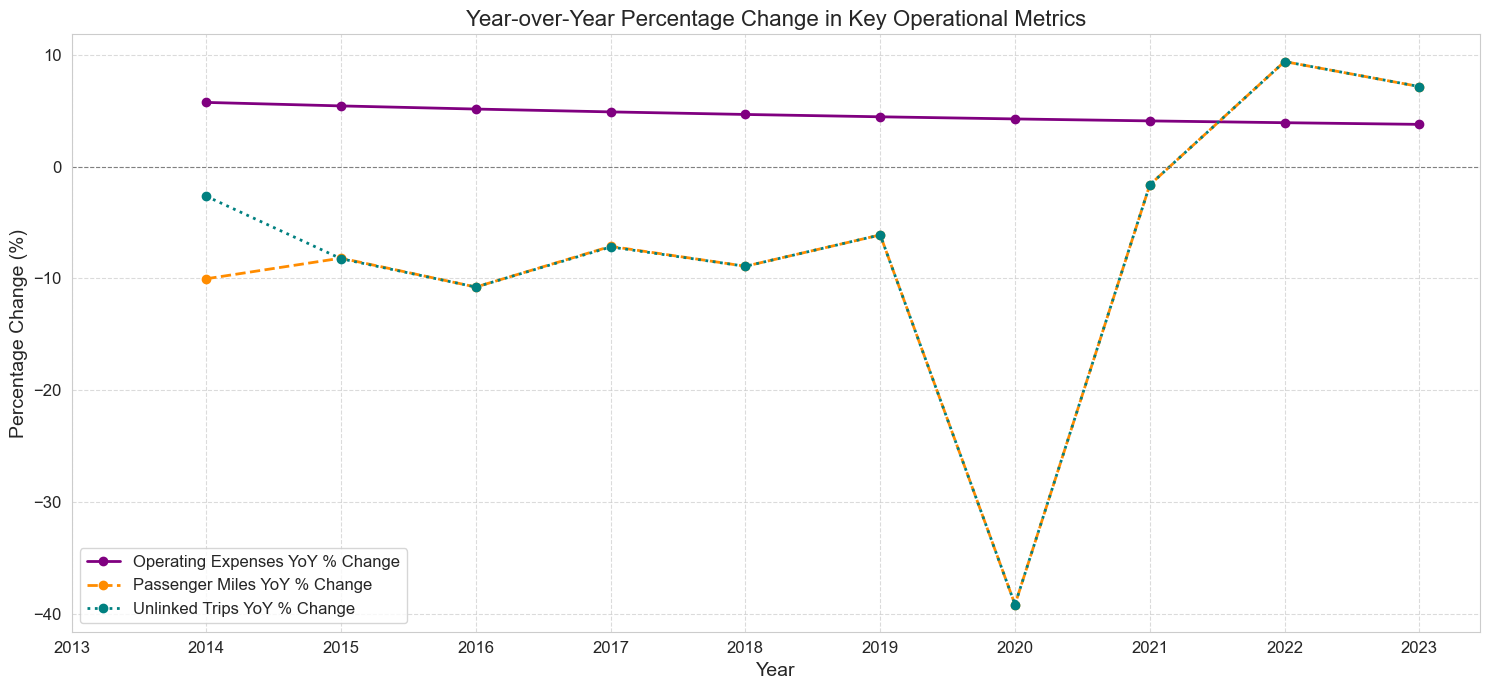

In [8]:
# Sort by Year to ensure correct YoY calculation
df_sorted = df.sort_values(by='Year').copy()

# Calculate YoY percentage change for key metrics
df_sorted['YoY_Operating_Expenses_Change'] = df_sorted['Operating Expenses (Bus)'].pct_change() * 100
df_sorted['YoY_Passenger_Miles_Change'] = df_sorted['Annual Passenger Miles (Bus)'].pct_change() * 100
df_sorted['YoY_Unlinked_Trips_Change'] = df_sorted['Annual Unlinked Trips (Bus)'].pct_change() * 100

print("### Year-over-Year Percentage Changes ###")
print(df_sorted[['Year', 'YoY_Operating_Expenses_Change', 'YoY_Passenger_Miles_Change', 'YoY_Unlinked_Trips_Change']].round(2))
print("\n")

# Visualize YoY Changes
plt.figure(figsize=(15, 7))

plt.plot(df_sorted['Year'], df_sorted['YoY_Operating_Expenses_Change'], marker='o', linestyle='-', color='purple', label='Operating Expenses YoY % Change')
plt.plot(df_sorted['Year'], df_sorted['YoY_Passenger_Miles_Change'], marker='o', linestyle='--', color='darkorange', label='Passenger Miles YoY % Change')
plt.plot(df_sorted['Year'], df_sorted['YoY_Unlinked_Trips_Change'], marker='o', linestyle=':', color='teal', label='Unlinked Trips YoY % Change')

plt.title('Year-over-Year Percentage Change in Key Operational Metrics')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Add a zero line for reference
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(df_sorted['Year']) # Ensure all years are shown on x-axis
plt.tight_layout()
plt.show()

### Calculated Efficiency Metrics (First 5 Rows) ###
   Year  Operating_Expense_Per_Passenger_Mile  \
0  2013                                  0.92   
1  2014                                  1.09   
2  2015                                  1.25   
3  2016                                  1.47   
4  2017                                  1.66   

   Operating_Expense_Per_Unlinked_Trip  Revenue_Miles_Per_Revenue_Hour  \
0                                 7.11                           18.75   
1                                 7.73                           18.74   
2                                 8.88                           18.81   
3                                10.46                           18.90   
4                                11.82                           18.04   

   Unlinked_Trips_Per_Revenue_Hour  
0                            15.05  
1                            13.91  
2                            12.70  
3                            11.50  
4                     

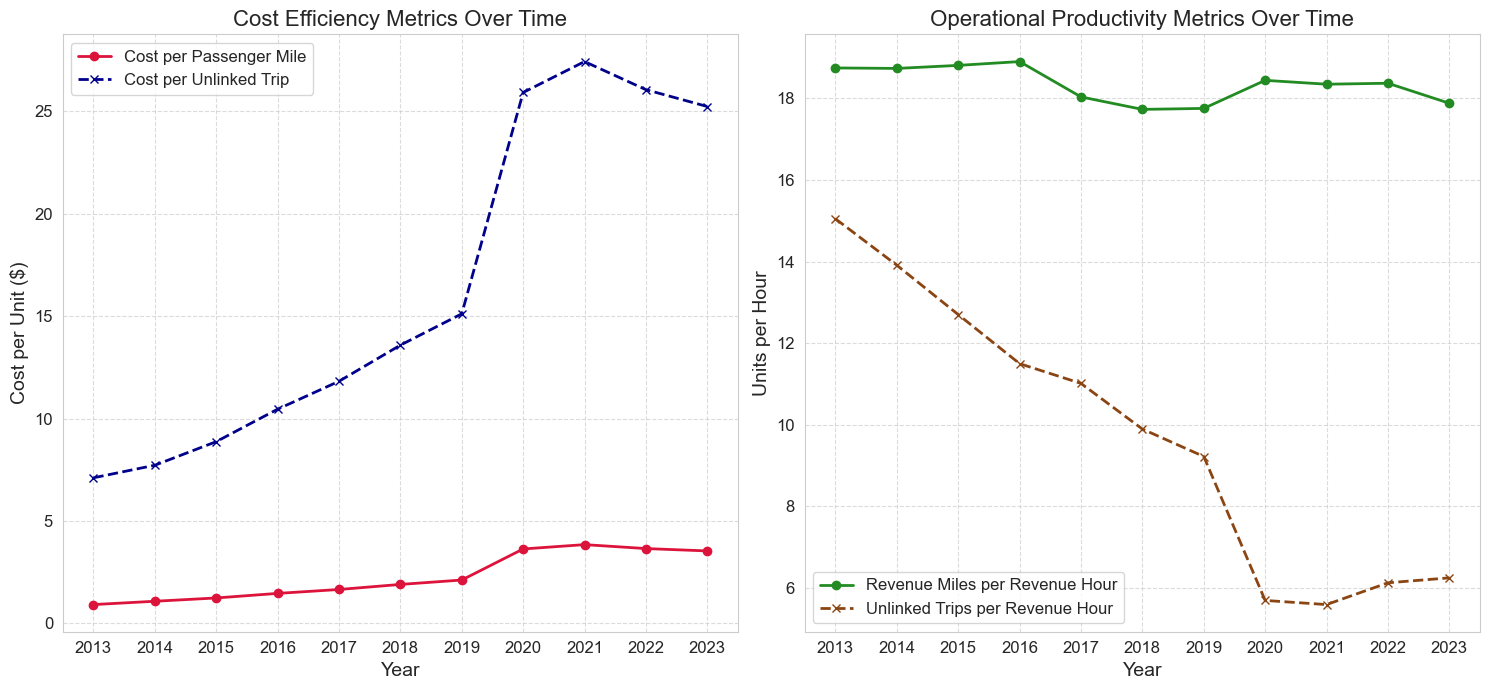

In [10]:
# Calculate Efficiency Metrics
df_sorted['Operating_Expense_Per_Passenger_Mile'] = df_sorted['Operating Expenses (Bus)'] / df_sorted['Annual Passenger Miles (Bus)']
df_sorted['Operating_Expense_Per_Unlinked_Trip'] = df_sorted['Operating Expenses (Bus)'] / df_sorted['Annual Unlinked Trips (Bus)']
df_sorted['Revenue_Miles_Per_Revenue_Hour'] = df_sorted['Annual Vehicle Revenue Miles (Bus)'] / df_sorted['Annual Vehicle Revenue Hours (Bus)']
df_sorted['Unlinked_Trips_Per_Revenue_Hour'] = df_sorted['Annual Unlinked Trips (Bus)'] / df_sorted['Annual Vehicle Revenue Hours (Bus)']

print("### Calculated Efficiency Metrics (First 5 Rows) ###")
print(df_sorted[['Year', 'Operating_Expense_Per_Passenger_Mile',
                 'Operating_Expense_Per_Unlinked_Trip',
                 'Revenue_Miles_Per_Revenue_Hour',
                 'Unlinked_Trips_Per_Revenue_Hour']].round(2).head())
print("\n")

# Visualize Efficiency Metrics Over Time
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.plot(df_sorted['Year'], df_sorted['Operating_Expense_Per_Passenger_Mile'], marker='o', color='crimson', label='Cost per Passenger Mile')
plt.plot(df_sorted['Year'], df_sorted['Operating_Expense_Per_Unlinked_Trip'], marker='x', linestyle='--', color='darkblue', label='Cost per Unlinked Trip')
plt.title('Cost Efficiency Metrics Over Time')
plt.xlabel('Year')
plt.ylabel('Cost per Unit ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(df_sorted['Year'])

plt.subplot(1, 2, 2)
plt.plot(df_sorted['Year'], df_sorted['Revenue_Miles_Per_Revenue_Hour'], marker='o', color='forestgreen', label='Revenue Miles per Revenue Hour')
plt.plot(df_sorted['Year'], df_sorted['Unlinked_Trips_Per_Revenue_Hour'], marker='x', linestyle='--', color='saddlebrown', label='Unlinked Trips per Revenue Hour')
plt.title('Operational Productivity Metrics Over Time')
plt.xlabel('Year')
plt.ylabel('Units per Hour')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(df_sorted['Year'])

plt.tight_layout()
plt.show()

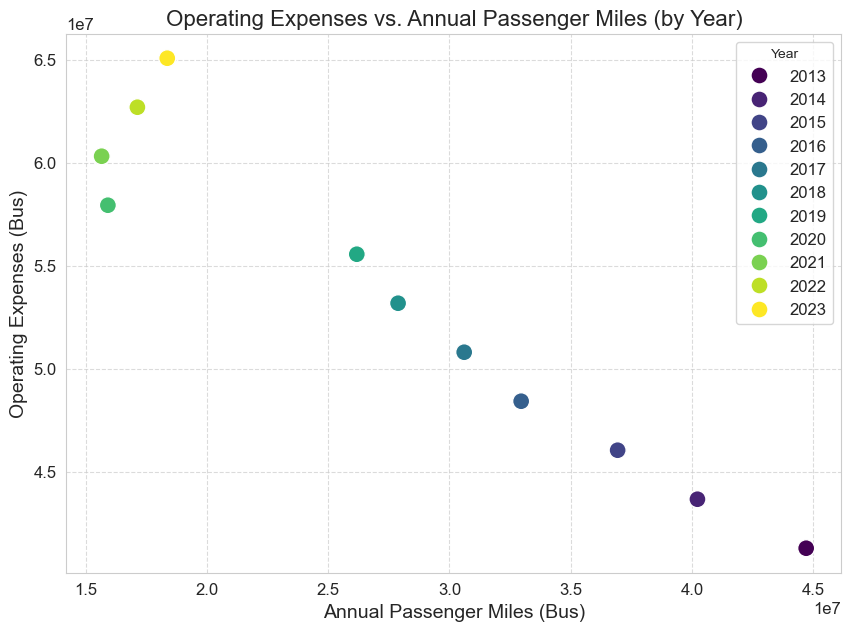

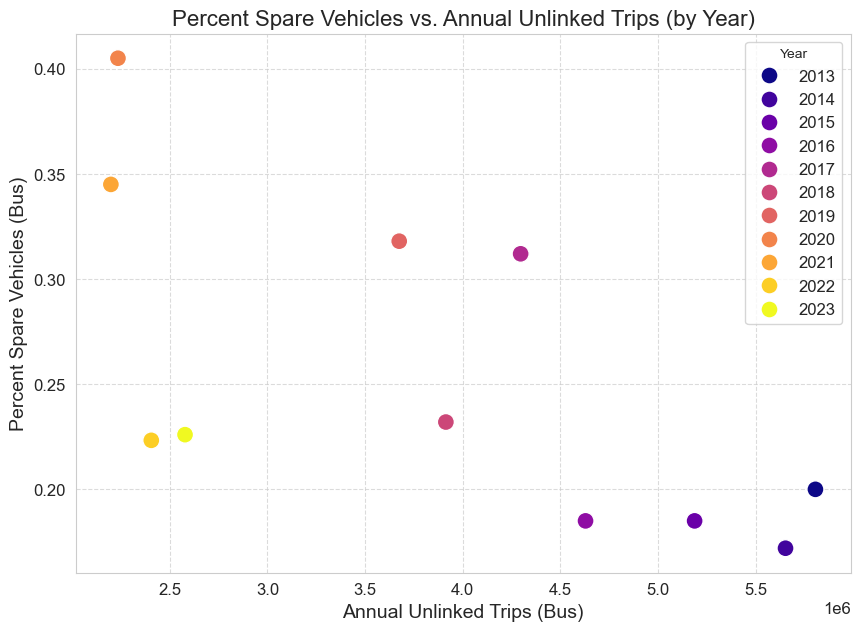

In [12]:
# Scatter plot: Operating Expenses vs. Annual Passenger Miles
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Passenger Miles (Bus)', y='Operating Expenses (Bus)', hue='Year', data=df_sorted, s=150, palette='viridis', legend='full')
plt.title('Operating Expenses vs. Annual Passenger Miles (by Year)')
plt.xlabel('Annual Passenger Miles (Bus)')
plt.ylabel('Operating Expenses (Bus)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Scatter plot: Percent Spare Vehicles vs. Annual Unlinked Trips
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Unlinked Trips (Bus)', y='Percent Spare Vehicles (Bus)', hue='Year', data=df_sorted, s=150, palette='plasma', legend='full')
plt.title('Percent Spare Vehicles vs. Annual Unlinked Trips (by Year)')
plt.xlabel('Annual Unlinked Trips (Bus)')
plt.ylabel('Percent Spare Vehicles (Bus)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

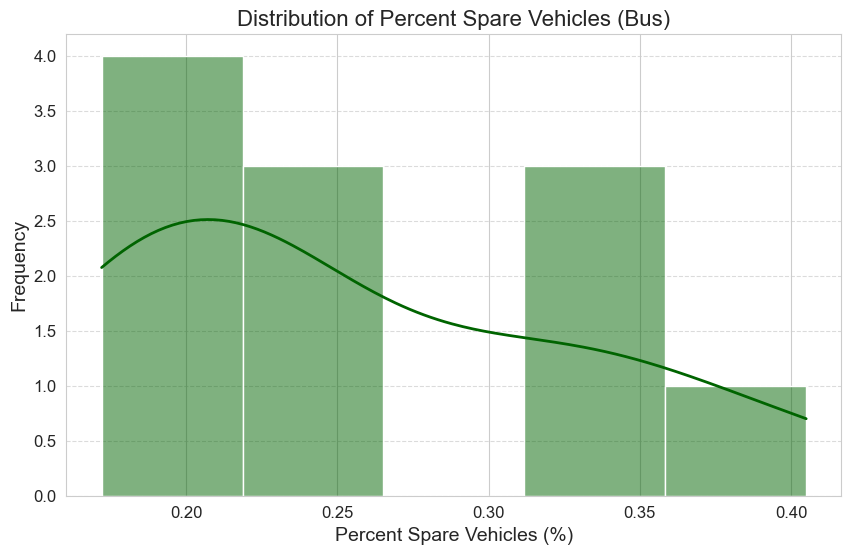

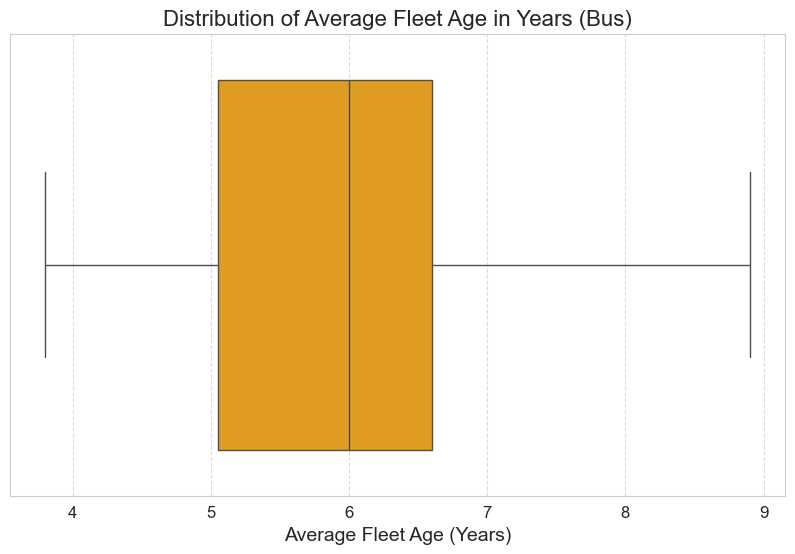

In [14]:
# Distribution of Percent Spare Vehicles
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted['Percent Spare Vehicles (Bus)'], kde=True, bins=5, color='darkgreen')
plt.title('Distribution of Percent Spare Vehicles (Bus)')
plt.xlabel('Percent Spare Vehicles (%)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Distribution of Average Fleet Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_sorted['Average Fleet Age in Years (Bus)'], color='orange')
plt.title('Distribution of Average Fleet Age in Years (Bus)')
plt.xlabel('Average Fleet Age (Years)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()